In [1]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt, os

In [2]:
train_folder = "/Users/ramnikhilmeka/Documents/CIcdata/train"
test_folder = "/Users/ramnikhilmeka/Documents/CIcdata/test"

In [3]:
df_train = pd.concat([pd.read_parquet("train/" + df) for df in os.listdir(train_folder) ], ignore_index=True)
df_test = pd.concat([pd.read_parquet("test/" + df) for df in os.listdir(test_folder)], ignore_index=True)
df_train.shape, df_test.shape

((125170, 78), (306201, 78))

In [4]:
df_train.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Fla

In [5]:
df_test.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Fla

In [6]:
#Check if all columns are present in both the datasets
df_train.columns == df_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [7]:
#Checking the distribution for the target labels
df_train["Label"].value_counts()

Syn        48840
Benign     46427
UDP        18090
MSSQL       8523
LDAP        1906
Portmap      685
NetBIOS      644
UDPLag        55
Name: Label, dtype: int64

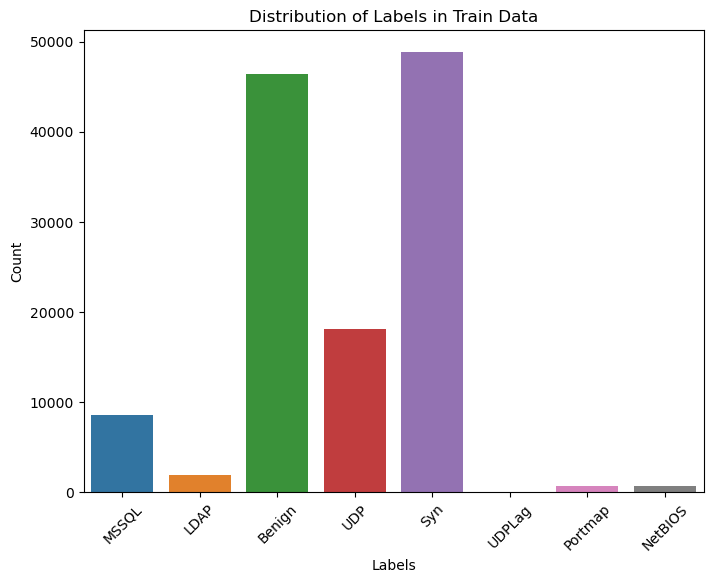

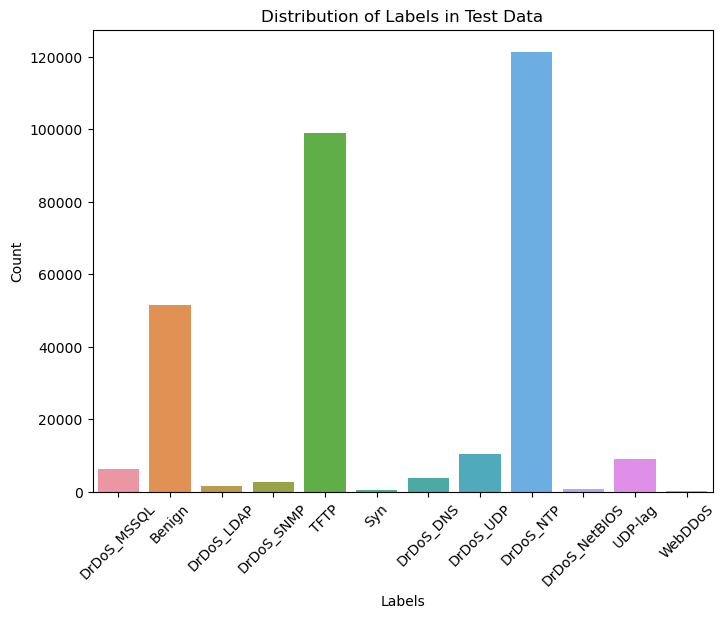

In [8]:
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x="Label")
plt.title("Distribution of Labels in Train Data")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.xticks(rotation=45)  
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df_test, x="Label")
plt.title("Distribution of Labels in Test Data")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.xticks(rotation=45)  
plt.show()


We see that the label names are different and the data is highly imbalanced. We can either treat ddos attacks as malign or benign or we can train on all the classes and make multi class classification

In [9]:
# matching the labels on test and train dataframes

df_test.loc[df_test['Label'].str.contains('-'), 'Label'] = df_test['Label'].str.replace('-', '')

df_test.loc[df_test['Label'].str.contains('_'), 'Label'] = df_test['Label'].str.split('_').str[1]


In [10]:
# Extract unique labels from both train and test DataFrames
train_labels = set(df_train['Label'])
test_labels = set(df_test['Label'])

In [11]:

df_test['Label'] = df_test['Label'].replace({'UDPlag': 'UDPLag'}, regex=True)

# all instances of "UDPlag" in the "label" column are replaced with "UDPLag"

filtered_df_test = df_test[df_test['Label'].isin(train_labels)]


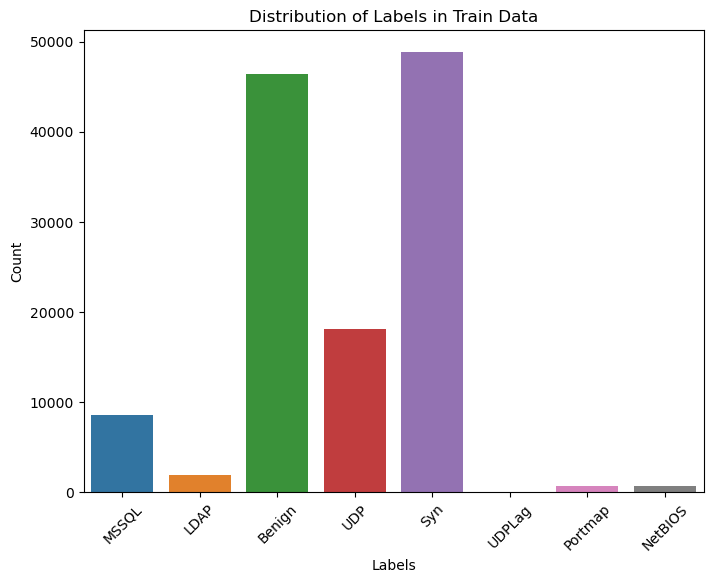

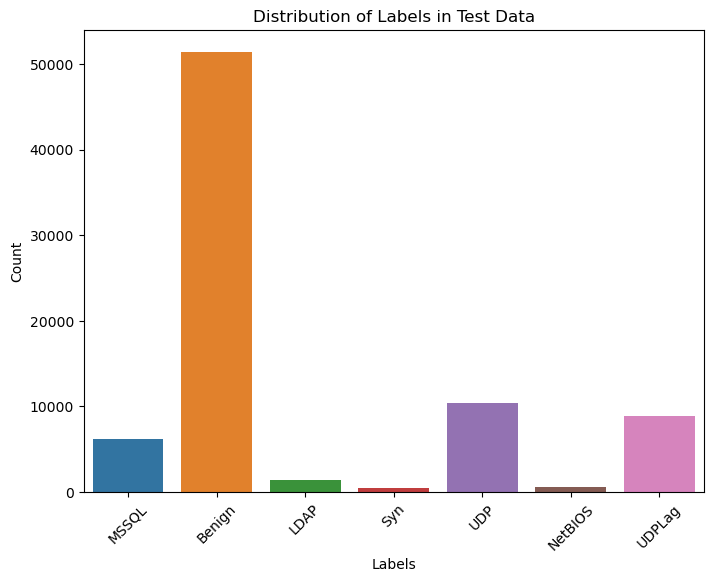

In [12]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x="Label")
plt.title("Distribution of Labels in Train Data")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.xticks(rotation=45) 
plt.show()



plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_df_test, x="Label")
plt.title("Distribution of Labels in Test Data")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.xticks(rotation=45)  
plt.show()

We see that data for Syn class is much more in train than test,hence the data is not stratified. Let us stratify the dataframes


In [13]:
from sklearn.model_selection import train_test_split

df_combined = pd.concat([df_train, filtered_df_test], axis=0)

# Stratify the data based on the "Label" column
train_combined, test_combined = train_test_split(df_combined, test_size=0.2, stratify=df_combined['Label'], random_state=42)



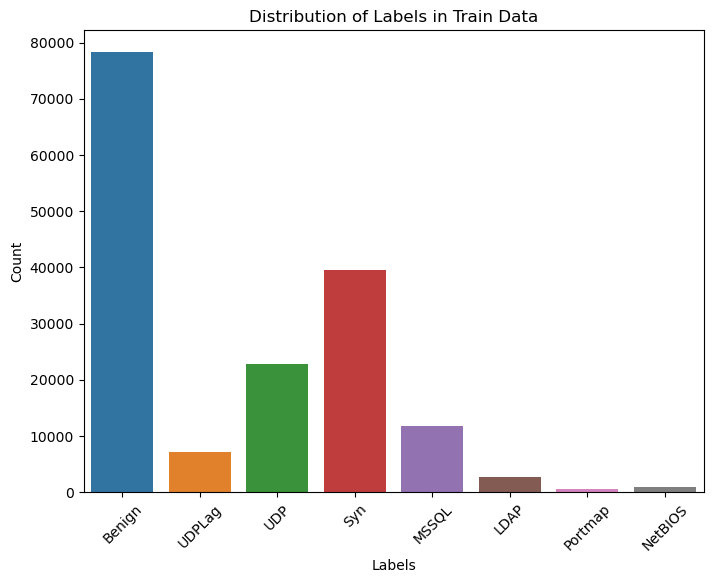

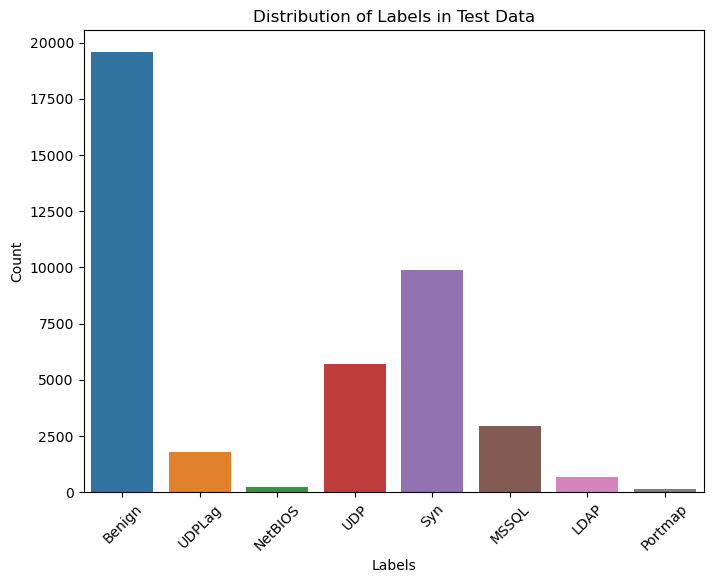

In [14]:

# Plot for df_train
plt.figure(figsize=(8, 6))
sns.countplot(data=train_combined, x="Label")
plt.title("Distribution of Labels in Train Data")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.xticks(rotation=45) 
plt.show()



plt.figure(figsize=(8, 6))
sns.countplot(data=test_combined, x="Label")
plt.title("Distribution of Labels in Test Data")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.xticks(rotation=45) 
plt.show()

Now we have balanced test and train dataframes

In [15]:
##EDA

In [16]:
train_combined.describe()


,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,163719.000000,1.637190e+05,163719.000000,163719.000000,1.637190e+05,1.637190e+05,163719.000000,163719.000000,163719.000000,163719.000000,...,163719.000000,1.637190e+05,1.637190e+05,1.637190e+05,1.637190e+05,1.637190e+05,163719.0,1.637190e+05,163719.0,163719.0
mean,10.613301,1.580001e+07,7.730068,5.027089,9.858308e+02,3.198767e+03,209.254684,129.361115,146.740967,27.306349,...,4.475889,-1.461527e+07,6.941851e+04,5.349608e+04,1.401101e+05,3.812736e+04,5158379.0,1.053072e+06,6258830.0,4194999.5
std,5.506075,2.903156e+07,217.141141,41.625350,4.592667e+04,8.662866e+04,391.301880,256.695557,260.795319,96.404106,...,21.354851,1.237936e+08,4.583226e+05,3.211992e+05,7.418269e+05,4.033162e+05,10862039.0,2.819255e+06,12340356.0,10070095.0
min,0.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
25%,6.000000,3.985000e+02,2.000000,0.000000,2.400000e+01,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
50%,6.000000,9.164300e+04,4.000000,2.000000,7.400000e+01,0.000000e+00,32.000000,6.000000,30.799999,0.000000,...,1.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
75%,17.000000,2.490974e+07,8.000000,2.000000,1.180000e+03,9.200000e+01,389.000000,123.000000,300.000000,18.874586,...,5.000000,2.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,9986278.5,0.000000e+00,10019450.0,6438521.0
max,17.000000,1.199987e+08,86666.000000,8029.000000,1.526642e+07,1.289243e+07,32120.000000,2114.000000,3015.290527,2221.556152,...,5043.000000,6.724045e+07,4.050800e+07,2.135244e+07,4.553668e+07,4.050800e+07,117569200.0,6.961402e+07,117569200.0,117569200.0


/var/folders/qp/qwdjj629537cz0pmv0q6xn180000gn/T/ipykernel_6132/713399516.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


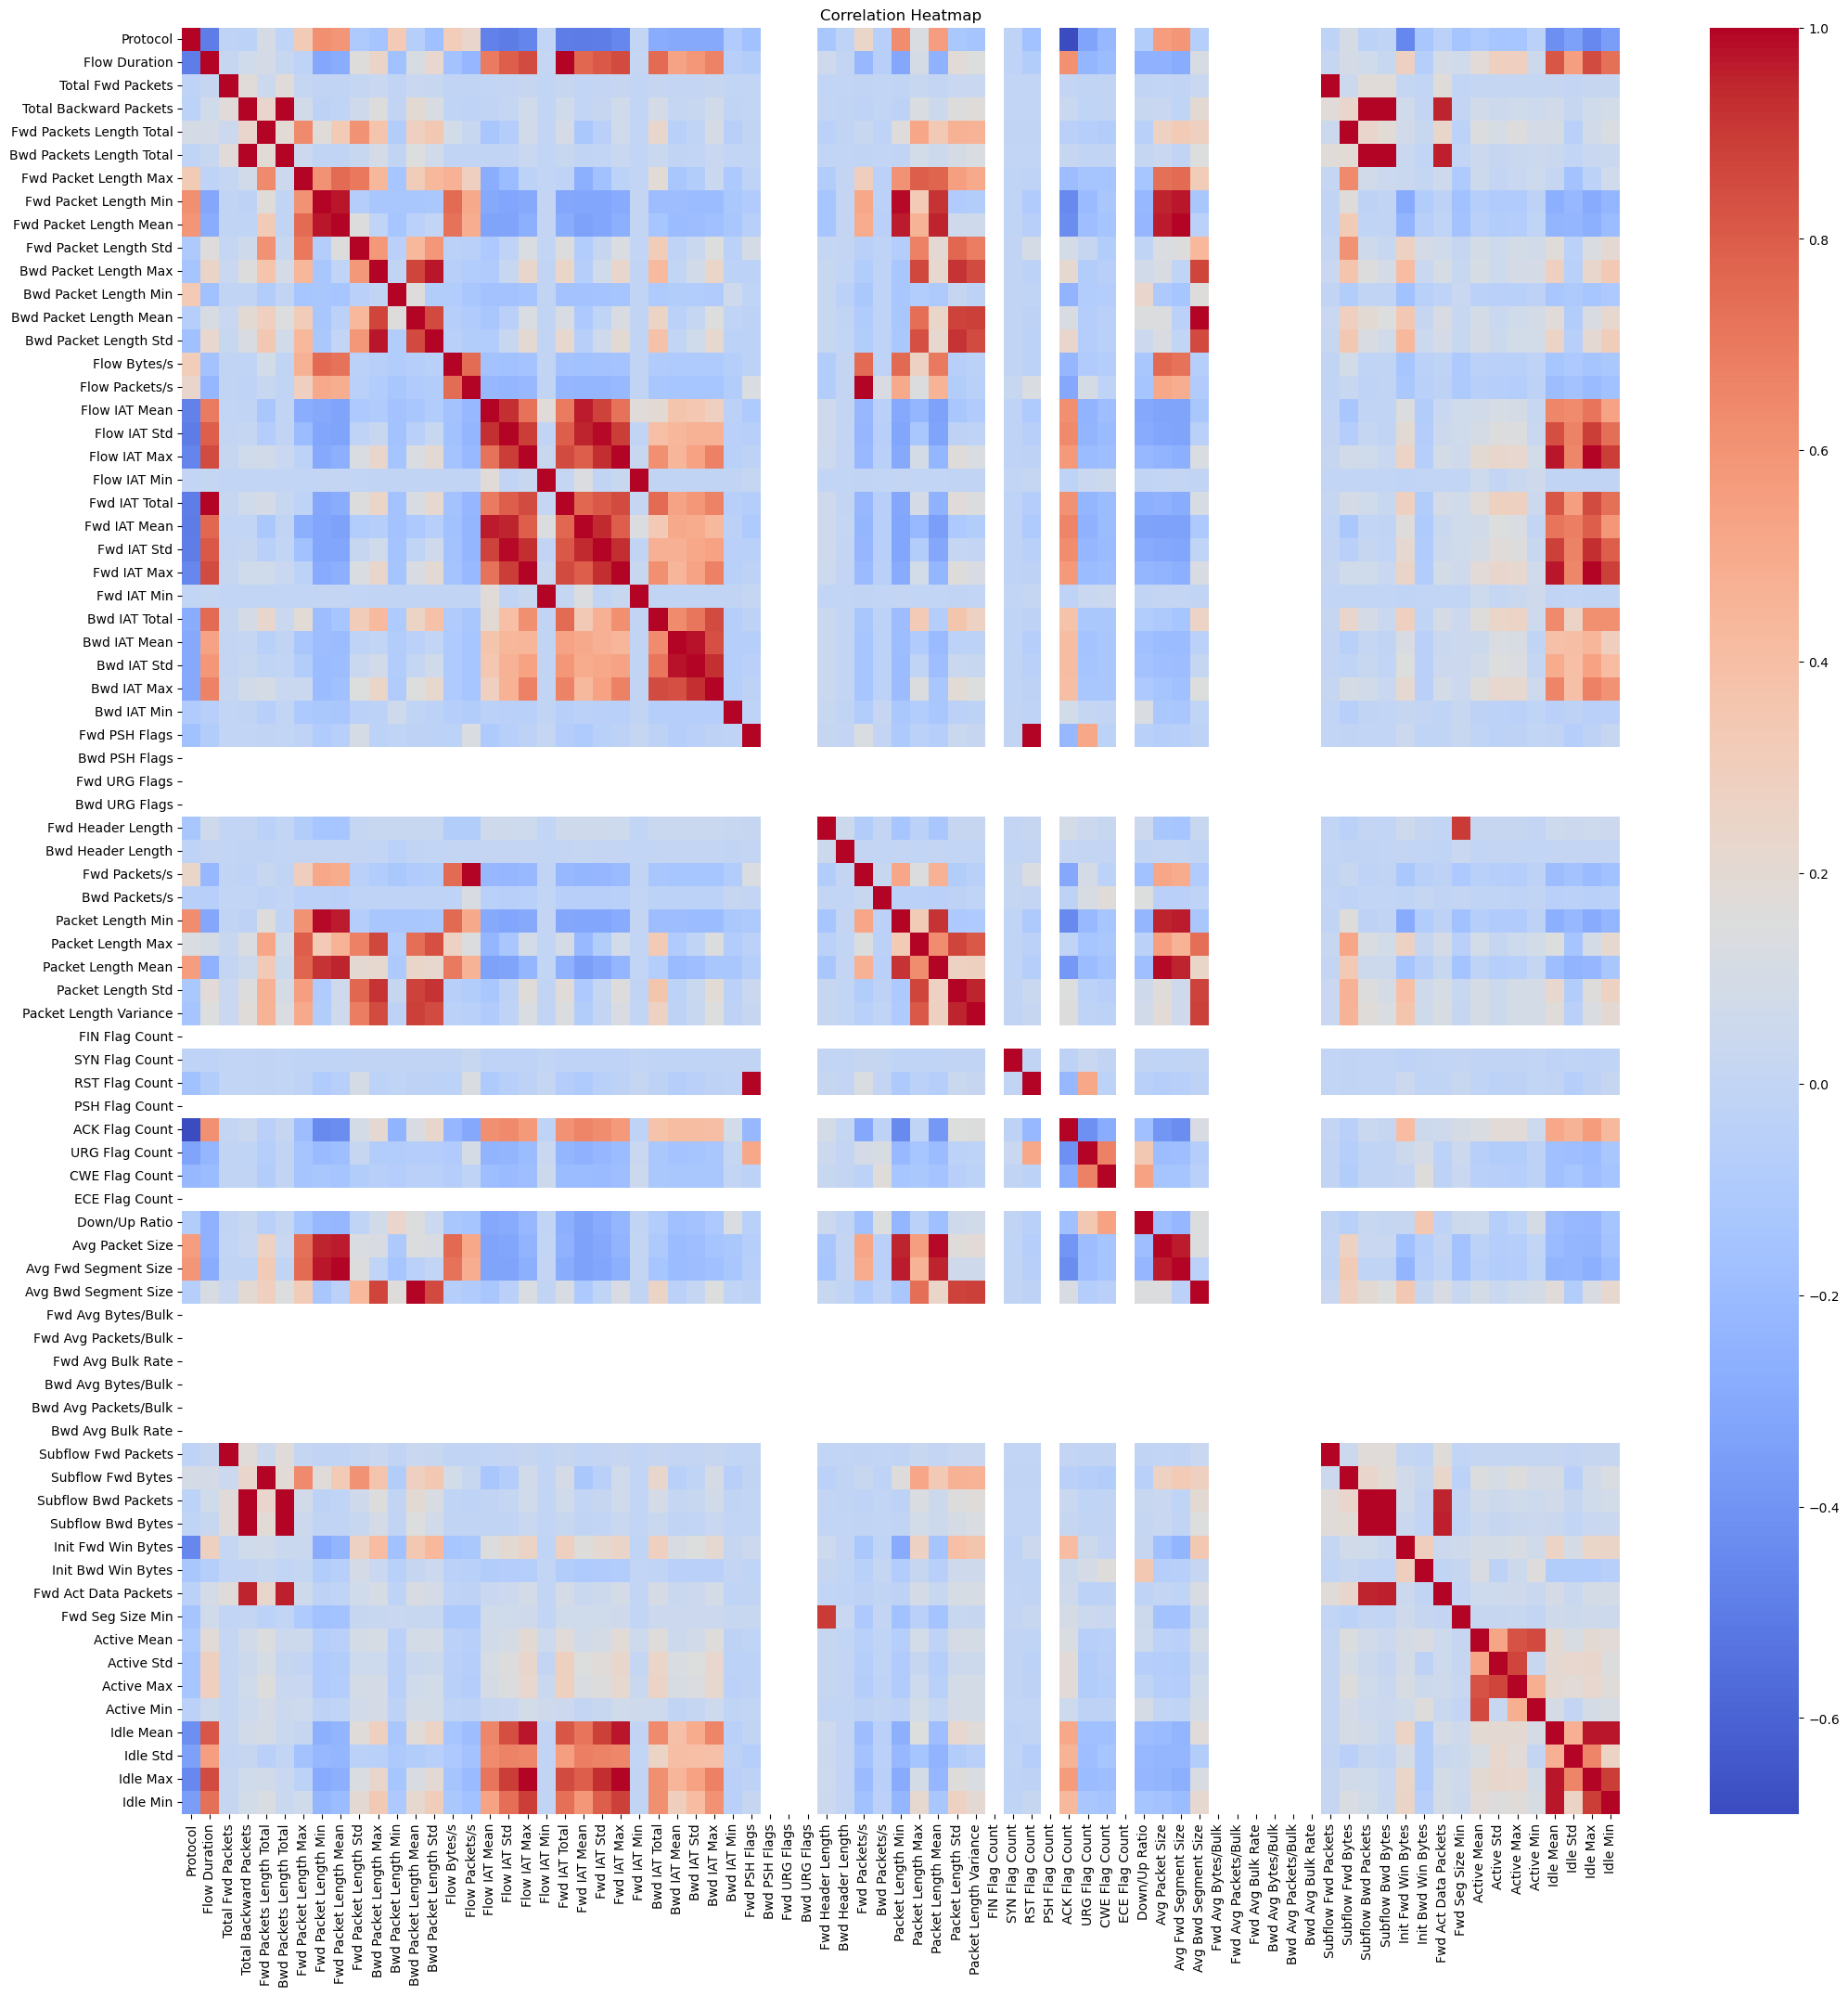

In [17]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [18]:
# Define a threshold for high correlation
threshold = 0.7

columns_to_drop = set()

correlation_matrix = train_combined.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        
        # Check if the correlation between the columns exceeds the threshold
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            columns_to_drop.add(col2)  

# Drop the highly correlated columns
df_train = train_combined.drop(columns=columns_to_drop)
df_test = test_combined.drop(columns=columns_to_drop)
df_train

/var/folders/qp/qwdjj629537cz0pmv0q6xn180000gn/T/ipykernel_6132/2124379443.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_combined.corr()


,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow IAT Mean,...,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init Fwd Win Bytes,Init Bwd Win Bytes,Active Mean,Active Std,Idle Std,Label
92218,6,117679896,26,22,1834.0,517.0,0.0,1418.0,0.0,2.503828e+06,...,0,0,0,0,29200,244,121964.0,76293.992188,3.268177e+05,Benign
294157,6,38354089,8,0,0.0,0.0,0.0,0.0,0.0,5.479156e+06,...,0,0,0,0,5840,-1,49.0,0.000000,7.017568e+05,UDPLag
292283,6,50108,1,2,37.0,37.0,37.0,0.0,0.0,2.505400e+04,...,0,0,0,0,16324,0,0.0,0.000000,0.000000e+00,Benign
37708,17,214485,6,0,2088.0,393.0,321.0,0.0,0.0,4.289700e+04,...,0,0,0,0,-1,-1,0.0,0.000000,0.000000e+00,UDP
66585,6,6341124,4,0,24.0,6.0,6.0,0.0,0.0,2.113708e+06,...,0,0,0,0,5840,-1,1.0,0.000000,0.000000e+00,Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67572,6,36093877,6,2,36.0,6.0,6.0,6.0,6.0,5.156268e+06,...,0,0,0,0,5840,0,1.0,0.000000,8.447700e+06,Syn
78667,6,57849524,10,6,60.0,6.0,6.0,6.0,6.0,3.856635e+06,...,0,0,0,0,5840,0,40.0,50.139805,1.820478e+06,Syn
122493,17,21035,2,2,62.0,31.0,31.0,255.0,255.0,7.011667e+03,...,0,0,0,0,-1,-1,0.0,0.000000,0.000000e+00,Benign
155476,17,46518,2,2,62.0,31.0,31.0,78.0,78.0,1.550600e+04,...,0,0,0,0,-1,-1,0.0,0.000000,0.000000e+00,Benign


All the highly correlated columns are now dropped

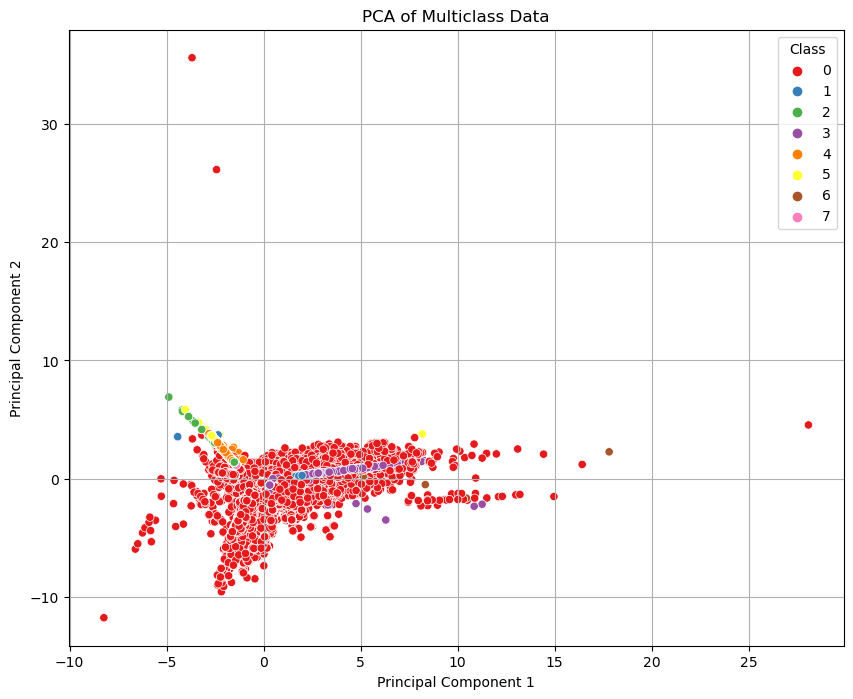

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

data = df_train

X = data.drop(columns=['Label'])
y = data['Label']

label_mapping = {}
unique_labels = []
for label in y:
    if label not in unique_labels:
        unique_labels.append(label)
    if label not in label_mapping:
        label_mapping[label] = unique_labels.index(label)

y_mapped = [label_mapping[label] for label in y]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Label'] = y_mapped  
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Label', palette='Set1')
plt.title('PCA of Multiclass Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', loc='upper right')
plt.grid()
plt.show()


We can see there is a pattern formed and hence a predictive model can be made


In [20]:
from sklearn.ensemble import RandomForestClassifier

X_train = df_train.drop(columns=['Label'])
y_train = df_train['Label']

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

feature_importances = clf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                     Feature  Importance
6      Fwd Packet Length Min    0.165809
5      Fwd Packet Length Max    0.102435
34        Init Fwd Win Bytes    0.076603
9              Flow IAT Mean    0.075827
4   Fwd Packets Length Total    0.075394
1              Flow Duration    0.068485
23            ACK Flag Count    0.057212
19             Bwd Packets/s    0.056193
38                  Idle Std    0.044485
2          Total Fwd Packets    0.036836
7      Bwd Packet Length Max    0.029944
17         Fwd Header Length    0.026760
0                   Protocol    0.026208
35        Init Bwd Win Bytes    0.026143
27             Down/Up Ratio    0.026089
24            URG Flag Count    0.020592
3     Total Backward Packets    0.018460
8      Bwd Packet Length Min    0.012830
18         Bwd Header Length    0.012081
11              Bwd IAT Mean    0.010387
10              Flow IAT Min    0.009625
37                Active Std    0.007970
36               Active Mean    0.005386
12              

In [21]:
columns_to_take = []
print(feature_importance_df["Feature"][:10].to_list())
columns_to_take = feature_importance_df["Feature"][:10].to_list()

['Fwd Packet Length Min', 'Fwd Packet Length Max', 'Init Fwd Win Bytes', 'Flow IAT Mean', 'Fwd Packets Length Total', 'Flow Duration', 'ACK Flag Count', 'Bwd Packets/s', 'Idle Std', 'Total Fwd Packets']


In [22]:
columns_to_take

['Fwd Packet Length Min',
 'Fwd Packet Length Max',
 'Init Fwd Win Bytes',
 'Flow IAT Mean',
 'Fwd Packets Length Total',
 'Flow Duration',
 'ACK Flag Count',
 'Bwd Packets/s',
 'Idle Std',
 'Total Fwd Packets']

In [23]:
# To avoid Model overfitting. We need to regularize 

In [24]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import pandas as pd


Xtr = df_train[columns_to_take]
ytr = df_train['Label']
xte = df_test[columns_to_take]
yte = df_test["Label"]



models = [
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [100, 200],
            'max_depth': [1, 5, 10],
            'max_features': ['sqrt'],
        }
    },
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(),
        'param_grid': {
            'penalty': ['l1', 'l2'],
            'C': [0.001, 0.01, 0.1, 1, 10],
        }
    },

    {
        'name': 'K-Nearest Neighbors',
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
        }
    },
]

best_model = None
best_accuracy = 0

for model_info in models:
    print(model_info)
    model_name = model_info['name']
    model = model_info['model']
    param_grid = model_info['param_grid']

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               scoring='accuracy', cv=5, n_jobs=-1)
    print("Hey")
    grid_search.fit(Xtr, ytr)
    print("Hi")
    best_model_for_current = grid_search.best_estimator_
    test_accuracy = best_model_for_current.score(xte, yte)

    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Cross-Validation Accuracy: {grid_search.best_score_}")
    print(f"Test Accuracy: {test_accuracy}\n")

    if test_accuracy > best_accuracy:
        best_model = best_model_for_current
        best_accuracy = test_accuracy

print(f"Best Model: {best_model.__class__.__name__}")
print(f"Best Test Accuracy: {best_accuracy}")


{'name': 'Random Forest', 'model': RandomForestClassifier(), 'param_grid': {'n_estimators': [100, 200], 'max_depth': [1, 5, 10], 'max_features': ['sqrt']}}
Hey
Hi
Model: Random Forest
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Cross-Validation Accuracy: 0.9770154875908782
Test Accuracy: 0.9758612264842413

{'name': 'Logistic Regression', 'model': LogisticRegression(), 'param_grid': {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10]}}
Hey


/Users/ramnikhilmeka/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ramnikhilmeka/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/ramnikhilmeka/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ramnikhilmeka/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Hi
Model: Logistic Regression
Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Cross-Validation Accuracy: 0.4267494373982831
Test Accuracy: 0.40625458099193745

{'name': 'K-Nearest Neighbors', 'model': KNeighborsClassifier(), 'param_grid': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}}
Hey
Hi
Model: K-Nearest Neighbors
Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Cross-Validation Accuracy: 0.9430426508486054
Test Accuracy: 0.9434888834595652

Best Model: RandomForestClassifier
Best Test Accuracy: 0.9758612264842413


In [25]:
##Random forest with top 10 columns gives us a very generalized model with the above model parameters

In [26]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical  
import numpy as np

label_encoder = LabelEncoder()
ytr_encoded = label_encoder.fit_transform(ytr)

X_train, X_val, y_train, y_val = train_test_split(Xtr, ytr_encoded, test_size=0.2, random_state=42)
num_classes = 8
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val, num_classes=num_classes)

input_shape = (10,)  

model = keras.Sequential([
    keras.layers.Dense(64, activation='sigmoid', input_shape=input_shape),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(16, activation='sigmoid'),
    keras.layers.Dense(8, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_one_hot, epochs=200, batch_size=200, validation_data=(X_val, y_val_one_hot))


Epoch 1/200
655/655 [==============================] - 1s 729us/step - loss: 1.2443 - accuracy: 0.5464 - val_loss: 0.8834 - val_accuracy: 0.7246
Epoch 2/200
655/655 [==============================] - 0s 630us/step - loss: 0.8415 - accuracy: 0.6948 - val_loss: 0.8023 - val_accuracy: 0.7365
Epoch 3/200
655/655 [==============================] - 0s 625us/step - loss: 0.7673 - accuracy: 0.7366 - val_loss: 0.7432 - val_accuracy: 0.7430
Epoch 4/200
655/655 [==============================] - 0s 625us/step - loss: 0.7282 - accuracy: 0.7503 - val_loss: 0.7013 - val_accuracy: 0.7674
Epoch 5/200
655/655 [==============================] - 0s 627us/step - loss: 0.6937 - accuracy: 0.7627 - val_loss: 0.7044 - val_accuracy: 0.7625
Epoch 6/200
655/655 [==============================] - 0s 625us/step - loss: 0.6882 - accuracy: 0.7636 - val_loss: 0.6842 - val_accuracy: 0.7687
Epoch 7/200
655/655 [==============================] - 0s 626us/step - loss: 0.7008 - accuracy: 0.7485 - val_loss: 0.7027 - val_ac

655/655 [==============================] - 0s 627us/step - loss: 0.5913 - accuracy: 0.7910 - val_loss: 0.6034 - val_accuracy: 0.7878
Epoch 58/200
655/655 [==============================] - 0s 627us/step - loss: 0.6053 - accuracy: 0.7846 - val_loss: 0.6422 - val_accuracy: 0.7902
Epoch 59/200
655/655 [==============================] - 0s 627us/step - loss: 0.6008 - accuracy: 0.7923 - val_loss: 0.5674 - val_accuracy: 0.8034
Epoch 60/200
655/655 [==============================] - 0s 626us/step - loss: 0.5917 - accuracy: 0.7912 - val_loss: 0.6329 - val_accuracy: 0.7764
Epoch 61/200
655/655 [==============================] - 0s 626us/step - loss: 0.5829 - accuracy: 0.7917 - val_loss: 0.5858 - val_accuracy: 0.7892
Epoch 62/200
655/655 [==============================] - 0s 626us/step - loss: 0.5940 - accuracy: 0.7883 - val_loss: 0.6107 - val_accuracy: 0.7755
Epoch 63/200
655/655 [==============================] - 0s 637us/step - loss: 0.6107 - accuracy: 0.7737 - val_loss: 0.6139 - val_accuracy

655/655 [==============================] - 0s 629us/step - loss: 0.5972 - accuracy: 0.7855 - val_loss: 0.6006 - val_accuracy: 0.7909
Epoch 114/200
655/655 [==============================] - 0s 625us/step - loss: 0.6060 - accuracy: 0.7828 - val_loss: 0.6139 - val_accuracy: 0.7697
Epoch 115/200
655/655 [==============================] - 0s 604us/step - loss: 0.6281 - accuracy: 0.7701 - val_loss: 0.7103 - val_accuracy: 0.7720
Epoch 116/200
655/655 [==============================] - 0s 640us/step - loss: 0.5873 - accuracy: 0.7934 - val_loss: 0.6020 - val_accuracy: 0.7956
Epoch 117/200
655/655 [==============================] - 0s 625us/step - loss: 0.6404 - accuracy: 0.7638 - val_loss: 0.6777 - val_accuracy: 0.7351
Epoch 118/200
655/655 [==============================] - 0s 628us/step - loss: 0.6595 - accuracy: 0.7493 - val_loss: 0.6531 - val_accuracy: 0.7534
Epoch 119/200
655/655 [==============================] - 0s 648us/step - loss: 0.6602 - accuracy: 0.7493 - val_loss: 0.6744 - val_ac

Epoch 169/200
655/655 [==============================] - 0s 626us/step - loss: 0.6008 - accuracy: 0.7880 - val_loss: 0.5889 - val_accuracy: 0.8013
Epoch 170/200
655/655 [==============================] - 0s 626us/step - loss: 0.6021 - accuracy: 0.7896 - val_loss: 0.6120 - val_accuracy: 0.7874
Epoch 171/200
655/655 [==============================] - 0s 628us/step - loss: 0.5717 - accuracy: 0.8043 - val_loss: 0.6111 - val_accuracy: 0.7844
Epoch 172/200
655/655 [==============================] - 0s 633us/step - loss: 0.6459 - accuracy: 0.7555 - val_loss: 0.6793 - val_accuracy: 0.7432
Epoch 173/200
655/655 [==============================] - 0s 629us/step - loss: 0.6654 - accuracy: 0.7416 - val_loss: 0.6634 - val_accuracy: 0.7608
Epoch 174/200
655/655 [==============================] - 0s 631us/step - loss: 0.6524 - accuracy: 0.7532 - val_loss: 0.6490 - val_accuracy: 0.7586
Epoch 175/200
655/655 [==============================] - 0s 626us/step - loss: 0.6460 - accuracy: 0.7573 - val_loss: 0

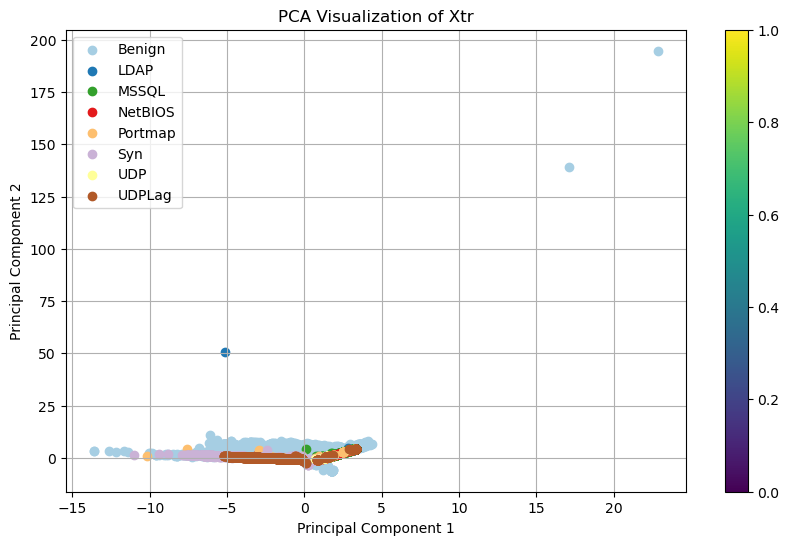

In [27]:
scaler = StandardScaler()
Xtr_standardized = scaler.fit_transform(Xtr)

pca = PCA(n_components=2)  
Xtr_pca = pca.fit_transform(Xtr_standardized)

label_encoder = LabelEncoder()
ytr_encoded = label_encoder.fit_transform(ytr)

unique_labels = np.unique(ytr_encoded)
colors = plt.cm.Paired(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(10, 6))
for i, label in enumerate(unique_labels):
    plt.scatter(Xtr_pca[ytr_encoded == label, 0], Xtr_pca[ytr_encoded == label, 1], label=label_encoder.classes_[label], c=[colors[i]])

plt.title('PCA Visualization of Xtr')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend()
plt.colorbar()
plt.grid()
plt.show()


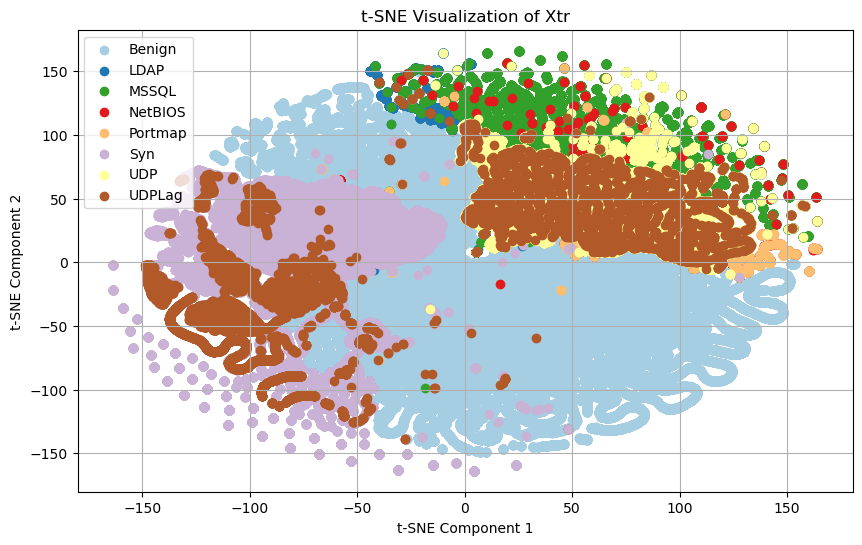

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtr_standardized = scaler.fit_transform(Xtr)

tsne = TSNE(n_components=2, random_state=42)  
Xtr_tsne = tsne.fit_transform(Xtr_standardized)

unique_labels = np.unique(ytr)
colors = plt.cm.Paired(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(10, 6))
for i, label in enumerate(unique_labels):
    plt.scatter(Xtr_tsne[ytr == label, 0], Xtr_tsne[ytr == label, 1], label=label, c=[colors[i]])

plt.title('t-SNE Visualization of Xtr')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.legend()
plt.grid()
plt.show()

In [29]:
##traditional ML model performs better than neural net on experimented with different neurons and depth.

In [30]:
#We also see that tsne beautifully identifies pattern from beingn and malignant attacks.